<a href="https://colab.research.google.com/github/mickeyranx/ML/blob/main/01_linear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
# we are going to classify a popular breast cancer dataset
data, target = datasets.load_breast_cancer(return_X_y=True)

In [4]:
# data is a matrix of shape (569, 30)
# the first number refers to the number of cases or samples while the second
# number refers to the number of features from which we try to predict
# breast cancer
#
# please see the documentation @ https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
# for more details
data.shape

(569, 30)

In [5]:
# target is a binary vector of size (569,) in which each entry is the label of
# each case, either malignant (0) or benign (1).
target[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [6]:
# for simplicity we cut the number of features from 30 to just two features
data = data[:, :2]

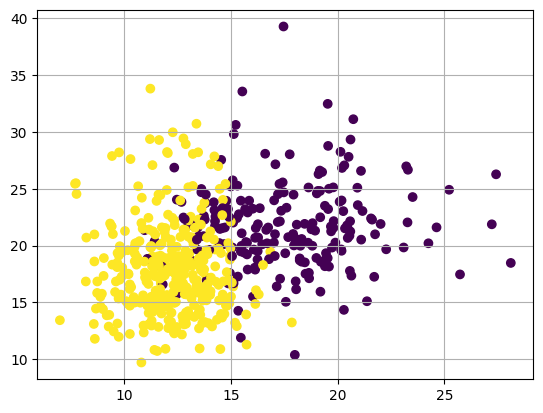

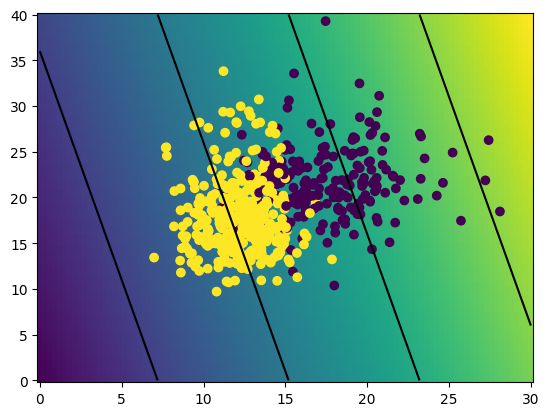

In [33]:
# Excercise 1.1
# Try to find a linear classifier by hand that can classify the dataset
# as good as possible. Let the classification rule be w1 * f1 + w2 * f2 + w3 > 0
# where w1, w2 and w3 are the weights to be learnt and f1, f2 are the features.
# What accuracy can you reach?
weights = [0.5,0.1,0.4]
xs = np.linspace(0,30,100)
ys = np.linspace(0,40,100)

#plot of the target data
fig, ax = plt.subplots()
ax.scatter(data[:,0], data[:,1], c = target )
plt.grid()
plt.show()


XS, YS = np.meshgrid(xs, ys)
data_grid = np.array([XS.flatten(), YS.flatten()]).T

def score(data, w):
    return w[0] * data[0] + w[1] * data[1] + w[2]


#scores = list(map(lambda x : score(x, weights), data_grid))
#fig, ax = plt.subplots()
scores = score((XS, YS), weights)
actual_scores = score(data, weights)
#scores.shape
fig, ax = plt.subplots()
CS = ax.pcolormesh(XS, YS, scores)
ax.contour(XS, YS, scores , 4, colors = "k")
ax.scatter(data[:,0], data[:,1], c = target )
plt.show()

predictions = map(lambda x : x < 0.5, scores.flatten())



#map()




#print(scores[20])
# Excercise 1.2
# Learn the optimal parameters automatically using gradient descent. For the
# loss function use a simple squared loss (t - tp)**2 where t is the target
# label (either 0 or 1) and tp = w1 * f1 + w2 * f2 + w3 is the predicted label.
# What accuracy can you reach? Why is this loss function problematic? Is there
# a better alternative?